In [92]:
import pandas as pd
import numpy as np
import seaborn as sns

In [93]:
df=pd.read_csv("Salary_Data.csv")

In [94]:
df['Salary'].count()

30

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [96]:
df['Salary']=df['Salary'].astype(int) # convert float to int datatype

In [210]:
x=df.iloc[:,:-1].values

In [213]:
y=df.iloc[:,1].values

In [214]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

In [100]:
# play with data like draw some graphs

In [101]:
#distplot , barplot ,boxplot ,countplot,heatmap

<AxesSubplot:xlabel='YearsExperience'>

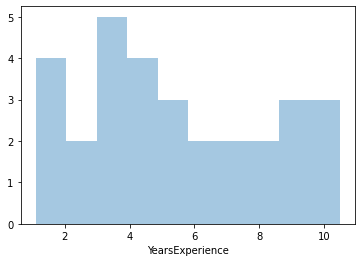

In [105]:
# distplot

sns.distplot(df['YearsExperience'],kde=False,bins=10 )

<AxesSubplot:xlabel='YearsExperience', ylabel='count'>

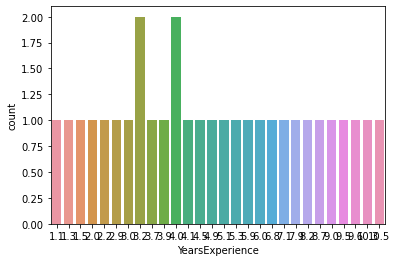

In [114]:
# countplot
sns.countplot(x='YearsExperience',data=df,)

c:\users\saaware.partners\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

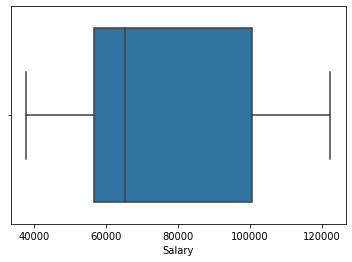

In [118]:
#boxplot
sns.boxplot('Salary',data=df)

<AxesSubplot:>

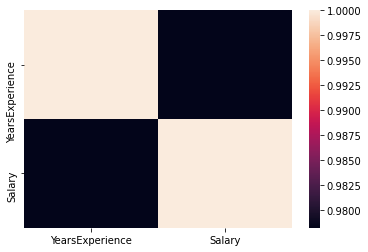

In [121]:
#heatmap
sns.heatmap(df.corr())

<AxesSubplot:>

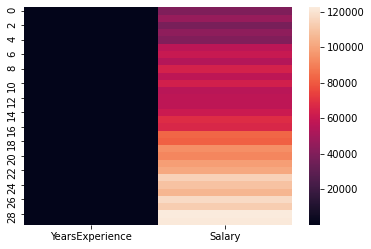

In [122]:
sns.heatmap(df)

# Start Linear regression

-->Linear regression id like if the experirnce increases then similary salary also increases (both are relationa or linear)

# Step1: Split the data 33% for testing and remain for training

In [169]:
from sklearn.model_selection import train_test_split   #scalar learn package

In [170]:
X_train , X_test, Y_train, Y_test = train_test_split(x,y,test_size=1/3,random_state=0)

So here , X_train contain "x column" value and amount of value is =total_column value count - 1/3 (test_size) mean 30-30/3=20

And same X_test contain "x column" value but 1/3 of total value means = 30/3= 10

Similaryly , Y_train contain y variable value and its = 30 -30/3= 20

Y_test contain y variable value like 30/3 = 10

Note: 30 is total numbers of records in x and y variables / colums and 1/3 is test_size of data

In [171]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

# step2: Fitting Simple linear regression to the training set

In [172]:
from sklearn.linear_model import LinearRegression


In [185]:
lr = LinearRegression()

# here we are passing both variables like : X_train -->independed variable and Y_train -->dependent variable 
#so the system will leanr from it

lr.fit(X_train,Y_train) 

LinearRegression()

# step3) :Predicting the test set Result

So here using "predict" menthod we can predict the result based on passing independent X_test values

here we dont pass Y_test becasue this one model has to predict result

In [187]:
pre_result =lr.predict(X_test)
pre_result

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

# Step 4: Now we have predicted result , so lets Visualize this predicted result 

In [175]:
import matplotlib.pyplot as plt 
%matplotlib inline


Train the data set graph :

So here we can see that our model trained dataset and provide proper middle level line of data 

all the velus are near the linear line like below

Text(0, 0.5, 'Salary')

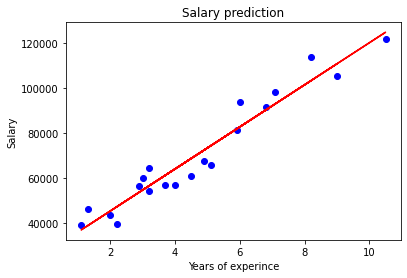

In [180]:
plt.scatter(X_train,Y_train,color='blue')
plt.plot(X_train,lr.predict(X_train),color='red')
plt.title("Salary prediction")
plt.xlabel("Years of experince")
plt.ylabel("Salary")


Test the dataset graph : So here we can see the redicted result graph below

Here example: 4 year experience can earn upto 6000 rs ( below two points are error , its should be neded on line where 6000 present

Text(0, 0.5, 'Salary')

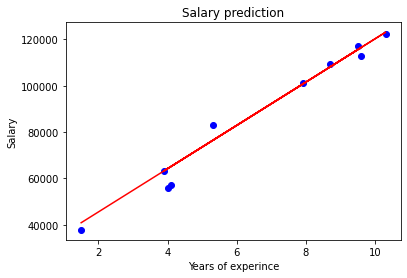

In [181]:
plt.scatter(X_test,Y_test,color='blue')
plt.plot(X_test,lr.predict(X_test),color='red')
plt.title("Salary prediction")
plt.xlabel("Years of experince")
plt.ylabel("Salary")

# Step 5: Find the mean of predicted values : Or residuals ( error in predcited values)

Here below square of means need to be minimum, which means result will be more accurete if those are minimum values

In [216]:
#caculate Residuals (error values)
from sklearn  import  metrics 
print ('MAE:',metrics.mean_absolute_error(Y_test,pre_result))
print('MSE:',metrics.mean_squared_error(Y_test,pre_result))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(Y_test,pre_result)))

MAE: 3426.4269374307078
MSE: 21026037.329511296
RMSE: 58.535689433291104
